<a href="https://colab.research.google.com/github/yamaguchinorimitsu/ajax_app/blob/master/%E7%B7%B4%E7%BF%92%EF%BC%93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

# CSVファイルを読み込み
df = pd.read_csv('/content/Survived.csv')

In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.shape

(891, 11)

In [3]:
# 欠損値を平均値で補完
df['Age'] = df['Age'].fillna(df['Age'].mean())

# 欠損値を最頻値で補完
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [4]:
# 特徴量とターゲットの分割

col = ['Pclass','Age','SibSp','Parch','Fare']
X = df[col]
y = df['Survived']

# 訓練データとテストデータの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
X_train.shape

(712, 5)

In [6]:
model = RandomForestClassifier(max_depth=6, random_state=0,class_weight ='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, random_state=0)

In [7]:
model.score(X_test,y_test)

0.7877094972067039

In [8]:
def learn(X,y,depth=3):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
    model = RandomForestClassifier(max_depth =depth,random_state = 0,class_weight="balanced")
    model.fit(X_train,y_train)

    score=model.score(X=X_train,y=y_train)
    score2=model.score(X=X_test,y=y_test)
    return round(score,3),round(score2,3),model

In [9]:
for j in range(1,15): # jは木の深さ jには1～14が入る
    # xは特徴量、yは正解データ
    train_score,test_score,model = learn(X,y,depth = j)
    sentence="訓練データの正解率{}"
    sentence2="訓練データの正解率{}"
    total_sentence='深さ{}:'+sentence+sentence2
    print(total_sentence.format(j,
    train_score,test_score))

深さ1:訓練データの正解率0.671訓練データの正解率0.721
深さ2:訓練データの正解率0.701訓練データの正解率0.737
深さ3:訓練データの正解率0.716訓練データの正解率0.743
深さ4:訓練データの正解率0.726訓練データの正解率0.754
深さ5:訓練データの正解率0.747訓練データの正解率0.771
深さ6:訓練データの正解率0.777訓練データの正解率0.788
深さ7:訓練データの正解率0.795訓練データの正解率0.782
深さ8:訓練データの正解率0.834訓練データの正解率0.777
深さ9:訓練データの正解率0.882訓練データの正解率0.743
深さ10:訓練データの正解率0.903訓練データの正解率0.737
深さ11:訓練データの正解率0.923訓練データの正解率0.721
深さ12:訓練データの正解率0.934訓練データの正解率0.715
深さ13:訓練データの正解率0.945訓練データの正解率0.709
深さ14:訓練データの正解率0.949訓練データの正解率0.709


In [10]:
pd.pivot_table(df,index = 'Survived',columns = 'Pclass',
values = 'Age')

Pclass,1,2,3
Survived,,,
0,40.896074,33.266947,27.417500
1,34.784615,26.076166,23.232689


In [11]:
# CSVファイルを読み込み
df2 = pd.read_csv('/content/Survived.csv')

# Age列の欠損値行を抜き出すのに必要（欠損だとTrue)
is_null = df2['Age'].isnull()

# Pclass 1　に関する埋め込み
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 0)
    &(is_null),'Age'] = 40
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 1)
    &(is_null),'Age'] = 34

# Pclass 2　に関する埋め込み
df2.loc[(df2['Pclass'] == 2) & (df2['Survived'] == 0)
    &(is_null),'Age'] = 33
df2.loc[(df['Pclass'] == 2) & (df2['Survived'] == 1)
    &(is_null),'Age'] = 26

# Pclass 3　に関する埋め込み
df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 0)
    &(is_null),'Age'] = 27
df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 1)
    &(is_null),'Age'] = 23

In [12]:
# 特徴量とターゲットの分割

col = ['Pclass','Age','SibSp','Parch','Fare']
X = df2[col]
y = df2['Survived']

for j in range(1,15): # jは木の深さ jには1～14が入る
    # xは特徴量、yは正解データ
    train_score,test_score,model = learn(X,y,depth = j)
    sentence="訓練データの正解率{}"
    sentence2="訓練データの正解率{}"
    total_sentence='深さ{}:'+sentence+sentence2
    print(total_sentence.format(j,
    train_score,test_score))

深さ1:訓練データの正解率0.657訓練データの正解率0.693
深さ2:訓練データの正解率0.706訓練データの正解率0.754
深さ3:訓練データの正解率0.744訓練データの正解率0.737
深さ4:訓練データの正解率0.757訓練データの正解率0.76
深さ5:訓練データの正解率0.794訓練データの正解率0.777
深さ6:訓練データの正解率0.824訓練データの正解率0.804
深さ7:訓練データの正解率0.846訓練データの正解率0.81
深さ8:訓練データの正解率0.879訓練データの正解率0.793
深さ9:訓練データの正解率0.907訓練データの正解率0.777
深さ10:訓練データの正解率0.938訓練データの正解率0.76
深さ11:訓練データの正解率0.959訓練データの正解率0.771
深さ12:訓練データの正解率0.972訓練データの正解率0.765
深さ13:訓練データの正解率0.975訓練データの正解率0.76
深さ14:訓練データの正解率0.98訓練データの正解率0.749


In [13]:
sex = df2.groupby('Sex').mean()
sex

<ipython-input-13-c3e4550d4976>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sex = df2.groupby('Sex').mean()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.636943,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.353847,0.429809,0.235702,25.523893


<Axes: xlabel='Sex'>

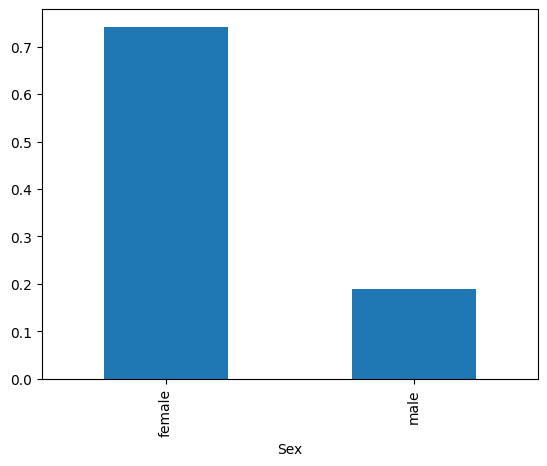

In [15]:
sex['Survived'].plot(kind='bar')


In [17]:
# ダミー変数への変換
male = pd.get_dummies(df2['Sex'], drop_first=True)


In [19]:
# 元のデータフレームとダミー変数を横方向に連結
df2_with_dummies = pd.concat([X, male], axis=1)

# 連結結果の表示
print(df2_with_dummies)

     Pclass   Age  SibSp  Parch     Fare  male
0         3  22.0      1      0   7.2500     1
1         1  38.0      1      0  71.2833     0
2         3  26.0      0      0   7.9250     0
3         1  35.0      1      0  53.1000     0
4         3  35.0      0      0   8.0500     1
..      ...   ...    ...    ...      ...   ...
886       2  27.0      0      0  13.0000     1
887       1  19.0      0      0  30.0000     0
888       3  27.0      1      2  23.4500     0
889       1  26.0      0      0  30.0000     1
890       3  32.0      0      0   7.7500     1

[891 rows x 6 columns]


In [21]:
X2 =df2_with_dummies

In [22]:


for j in range(1,15): # jは木の深さ jには1～14が入る
    # xは特徴量、yは正解データ
    train_score,test_score,model = learn(X2,y,depth = j)
    sentence="訓練データの正解率{}"
    sentence2="訓練データの正解率{}"
    total_sentence='深さ{}:'+sentence+sentence2
    print(total_sentence.format(j,
    train_score,test_score))

深さ1:訓練データの正解率0.784訓練データの正解率0.782
深さ2:訓練データの正解率0.802訓練データの正解率0.788
深さ3:訓練データの正解率0.822訓練データの正解率0.799
深さ4:訓練データの正解率0.857訓練データの正解率0.832
深さ5:訓練データの正解率0.871訓練データの正解率0.844
深さ6:訓練データの正解率0.889訓練データの正解率0.866
深さ7:訓練データの正解率0.909訓練データの正解率0.883
深さ8:訓練データの正解率0.926訓練データの正解率0.877
深さ9:訓練データの正解率0.942訓練データの正解率0.899
深さ10:訓練データの正解率0.951訓練データの正解率0.888
深さ11:訓練データの正解率0.965訓練データの正解率0.899
深さ12:訓練データの正解率0.975訓練データの正解率0.888
深さ13:訓練データの正解率0.982訓練データの正解率0.883
深さ14:訓練データの正解率0.986訓練データの正解率0.883


In [23]:
# 訓練データとテストデータの分割
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=0)

model = RandomForestClassifier(max_depth=9, random_state=0,class_weight ='balanced')
model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', max_depth=9, random_state=0)

In [24]:
model.score(X_test,y_test)

0.8994413407821229